In [186]:
import pandas as pd
import numpy as np

#INPUT PARAMS
FAST_HL = 110 # 5 to 1440
SLOW_HL = 520 # FAST_HL to 7*24*60 
EDGE_REQ = 0.01 # 0 to 0.05 


In [187]:
btc_prices = pd.read_csv('btc_march_april.csv')
#btc_prices = pd.read_csv('btc_after_end_april.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'btc_march_april.csv'

In [188]:
btc_prices['open_change'] = np.log(btc_prices['open_pr'] / btc_prices['open_pr'].shift(1))
btc_prices

timestamp_utc   open_pr   high_pr    low_pr  close_pr     volume  \
0      2021-04-26 00:00  49066.76  49275.74  49060.68  49239.20  199.71590   
1      2021-04-26 00:01  49236.45  49282.57  49129.36  49186.53  139.10180   
2      2021-04-26 00:02  49186.53  49202.73  48970.03  48982.93  173.64400   
3      2021-04-26 00:03  48986.38  48986.38  48864.38  48893.57   77.59120   
4      2021-04-26 00:04  48891.13  48891.13  48753.44  48799.99  128.71690   
...                 ...       ...       ...       ...       ...        ...   
86651  2021-06-25 04:11  35090.54  35092.01  34959.69  34965.23   28.51420   
86652  2021-06-25 04:12  34965.35  35016.60  34957.63  34965.38   19.08157   
86653  2021-06-25 04:13  34965.01  34966.60  34918.06  34933.04   18.54465   
86654  2021-06-25 04:14  34933.04  34990.49  34933.04  34979.68   21.87638   
86655  2021-06-25 04:15  34979.67  34979.67  34889.27  34901.37   18.94930   

         symbol create_timestamp_utc asset_type contract_type exchange  \
0      BTC/USDT  2021-06-08 00:24:11       spot          SPOT  binance   
1      BTC/USDT  2021-06-08 00:24:11       spot          SPOT  binance   
2      BTC/USDT  2021-06-08 00:24:11       spot          SPOT  binance   
3      BTC/USDT  2021-06-08 00:24:11       spot          SPOT  binance   
4      BTC/USDT  2021-06-08 00:24:11       spot          SPOT  binance   
...         ...                  ...        ...           ...      ...   
86651  BTC/USDT  2021-06-25 04:18:17       spot          SPOT  binance   
86652  BTC/USDT  2021-06-25 04:18:17       spot          SPOT  binance   
86653  BTC/USDT  2021-06-25 04:18:17       spot          SPOT  binance   
86654  BTC/USDT  2021-06-25 04:18:17       spot          SPOT  binance   
86655  BTC/USDT  2021-06-25 04:18:17       spot          SPOT  binance   

       open_change      ema_fast      ema_slow          edge  position  \
0              NaN  49066.760000  49066.760000  0.000000e+00         0   
1         0.003452  49151.661331  49151.622399  7.920803e-07         1   
2        -0.001014  49163.299658  49163.263039  7.448454e-07         1   
3        -0.004078  49118.981607  49119.015070 -6.812584e-07        -1   
4        -0.001946  49073.290183  49073.400662 -2.251305e-06        -1   
...            ...           ...           ...           ...       ...   
86651     0.001676  34283.392921  33834.490465  1.318036e-02         1   
86652    -0.003574  34284.297869  33834.954188  1.319305e-02         1   
86653    -0.000010  34285.201165  33835.417581  1.320570e-02         1   
86654    -0.000915  34286.060839  33835.867675  1.321747e-02         1   
86655     0.001334  34286.981249  33836.336705  1.323045e-02         1   

       port_ret  cum_port_ret  
0           NaN           NaN  
1      0.003452      0.003452  
2     -0.001014      0.002438  
3      0.004078      0.006515  
4      0.001946      0.008462  
...         ...           ...  
86651  0.001676      0.211541  
86652 -0.003574      0.207967  
86653 -0.000010      0.207957  
86654 -0.000915      0.207042  
86655  0.001334      0.208376  

[86656 rows x 18 columns]

<AxesSubplot:>

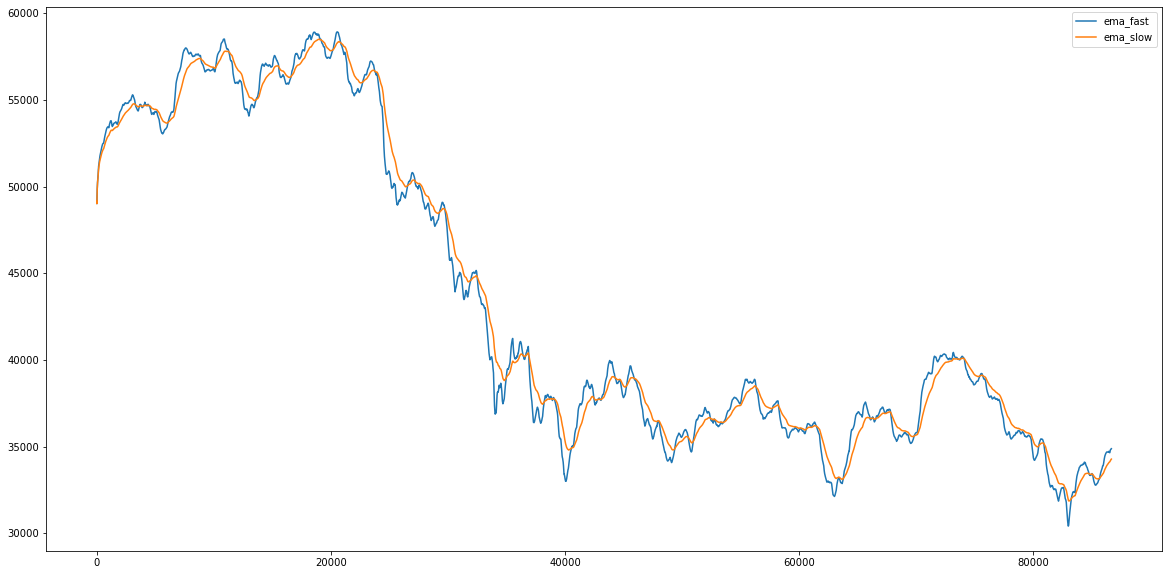

In [189]:
btc_prices['ema_fast'] = btc_prices['open_pr'].ewm(halflife=FAST_HL).mean()
btc_prices['ema_slow'] = btc_prices['open_pr'].ewm(halflife=SLOW_HL).mean()
btc_prices[['ema_fast', 'ema_slow']].plot(figsize=(20,10))

<AxesSubplot:>

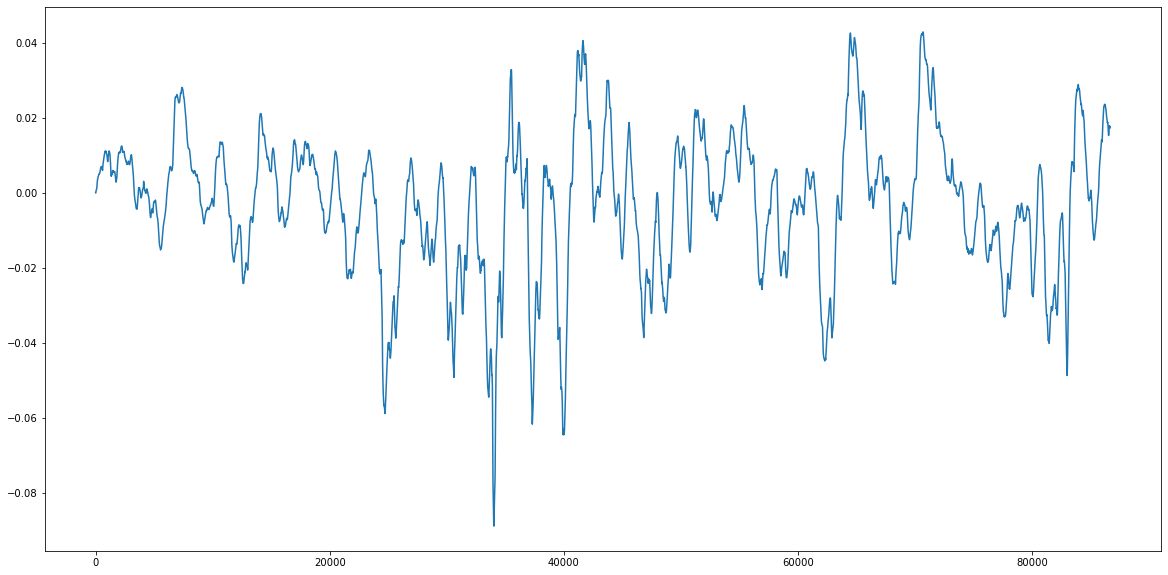

In [190]:
btc_prices['edge'] = np.log(btc_prices['ema_fast'] / btc_prices['ema_slow'])
btc_prices['edge'].plot(figsize=(20,10))

In [191]:
def target_position(x):

    edge_req = EDGE_REQ
    
    if x > edge_req:
        return 1
    elif x < -edge_req:
        return -1
    else:
        return 0
    


<AxesSubplot:>

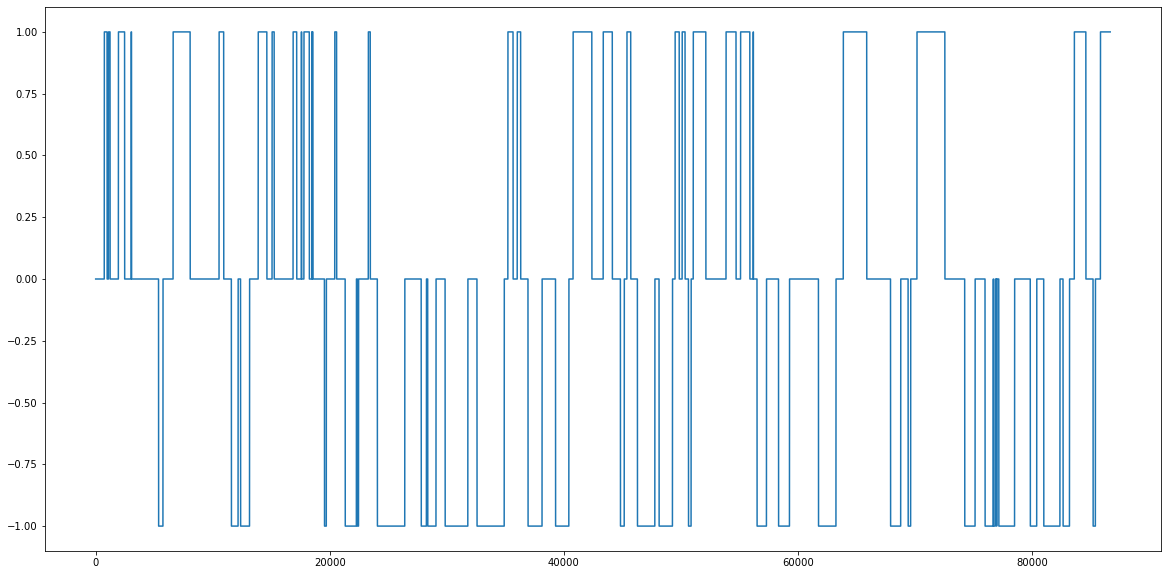

In [192]:
btc_prices['position'] = btc_prices['edge'].apply(target_position)
btc_prices['position'].plot(figsize=(20,10))

<AxesSubplot:>

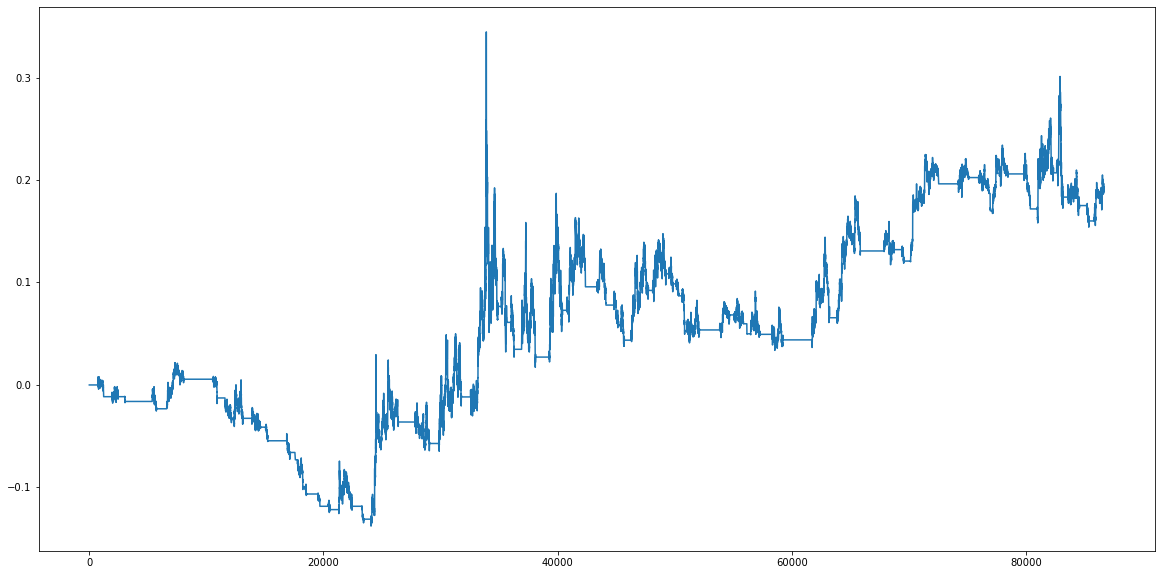

In [193]:
btc_prices['port_ret'] = btc_prices['open_change'] * btc_prices['position']
btc_prices['cum_port_ret'] = btc_prices['port_ret'].cumsum()
btc_prices['cum_port_ret'].plot(figsize=(20,10))

In [194]:
#SHARPE

btc_prices['cum_port_ret'].mean() / btc_prices['cum_port_ret'].std()

0.6140205625791737

In [185]:
#Total Returns
print(btc_prices['cum_port_ret'].tail(1))
btc_prices['cum_port_ret'].iloc[-1]

86655    0.208376
Name: cum_port_ret, dtype: float64


0.20837604031913295